In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/Users/ivprasad/Documents/GitHub/2025_DALI_Challenge/Data/img1.png')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# cv2.imshow('Original Image', img)
# cv2.waitKey(0)

# Define the range of green in HSV space
lower_green = np.array([80, 24, 20])  # Adjust as needed
upper_green = np.array([130, 255, 255])  # Adjust as needed

# Create a mask for the green color
green_mask = cv2.inRange(img_hsv, lower_green, upper_green)

# cv2.imshow('Green Mask', green_mask)
# cv2.waitKey(0)

# Morphological operations to clean up the mask
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Smaller kernel to keep squares distinct
mask_cleaned = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))


# Apply adaptive thresholding on the cleaned mask
mask_gray = cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask_cleaned), cv2.COLOR_BGR2GRAY)
adaptive_thresh = cv2.adaptiveThreshold(
    mask_gray, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 
    11,  # Block size: size of the pixel neighborhood
    2    # Constant subtracted from the mean
)

# cv2.imshow('Adaptive Threshold', adaptive_thresh)
# cv2.waitKey(0)

# Find contours in the thresholded image
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# # Generate filtered_contours based on min_area
# min_area = 10000  # Minimum area threshold to filter small contours
# filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_area]

aspected_contours = [cnt for cnt in contours if cv2.boundingRect(cnt)[2]/cv2.boundingRect(cnt)[3] > (95/100) and cv2.boundingRect(cnt)[2]/cv2.boundingRect(cnt)[3] < (100/95)]

border = max(aspected_contours, key=lambda cnt: cv2.contourArea(cnt))

x, y, w, h = cv2.boundingRect(border)
cropped_image = img[y:y+h, x:x+w]

# Display the original (for reference) and the star of the show: the cropped image!
# cv2.imshow('Original Image', img)
# cv2.imshow('Cropped Central Square', cropped_image)
# cv2.waitKey(0)

6989


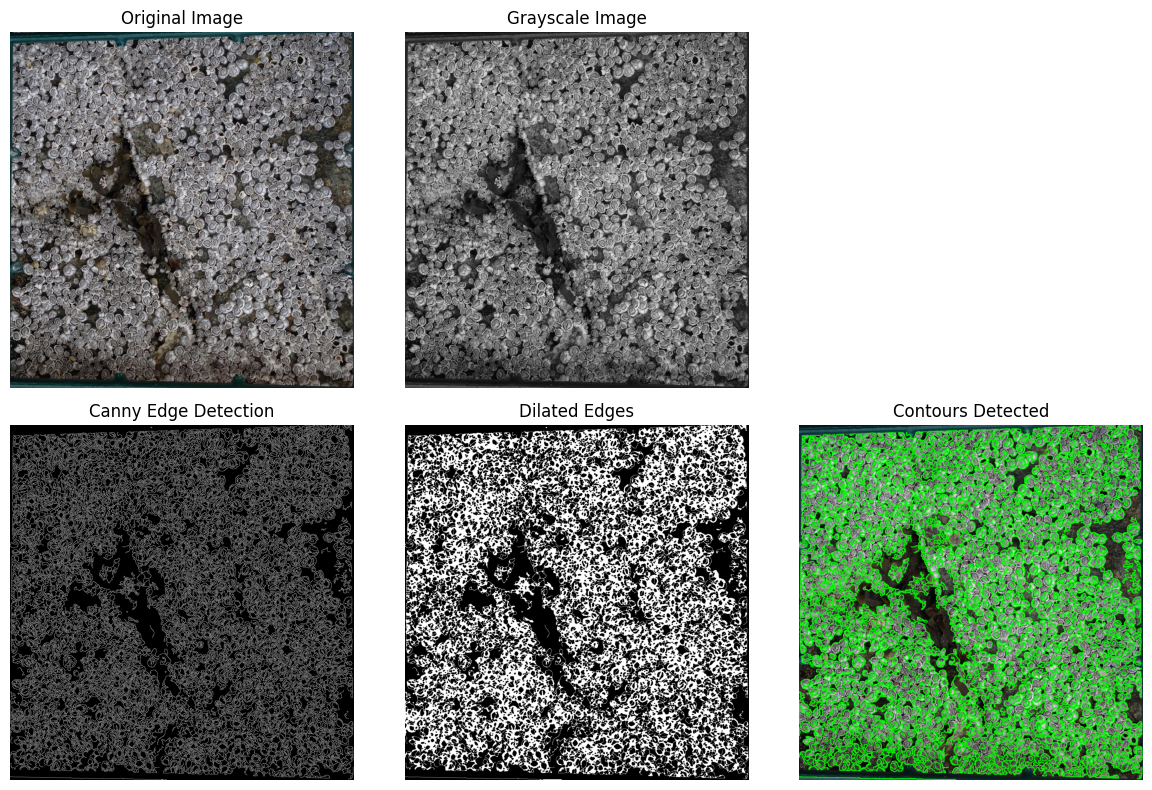

In [12]:
import matplotlib.pyplot as plt

# Read the image
image = cropped_image  # Replace with the path to your image

# Step 1: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

# # Step 3: Apply Adaptive Thresholding
# adaptive_thresh = cv2.adaptiveThreshold(
#     blurred_image, 
#     maxValue=255, 
#     adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,  # Or ADAPTIVE_THRESH_GAUSSIAN_C
#     thresholdType=cv2.THRESH_BINARY, 
#     blockSize=11,  # Local neighborhood size (must be odd)
#     C=2            # Constant to subtract from the calculated threshold
# )

# Step 4: Apply Canny edge detection on the image after adaptive thresholding
edges = cv2.Canny(blurred_image, 30, 150)  # Use standard Canny thresholds

# Step 5: Perform Morphological Operations (Dilation and Erosion)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)) # Define a 3x3 kernel

# Dilation: To connect broken edges and enhance edge features
morphed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Step 6: Find contours in the image after morphological operations
contours, hierarchy = cv2.findContours(
    morphed, 
    cv2.RETR_TREE,    # External contours only (adjust based on your needs)
    cv2.CHAIN_APPROX_SIMPLE  # Simplified contour approximation
)
print(len(contours))

contours = [contour for contour in contours if cv2.contourArea(contour) > 115]
#contours = [contour for contour in contours if len(contour) >= 5]
#contours = [contour for contour in contours if min(cv2.fitEllipse(contour)[1])/max(cv2.fitEllipse(contour)[1]) < 1.0 and min(cv2.fitEllipse(contour)[1])/max(cv2.fitEllipse(contour)[1]) > 0.4]

# Step 7: Draw the contours on a copy of the original image
contour_image = image.copy()

# Draw all contours in green (you can customize the color and thickness)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Step 8: Display the results using matplotlib
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(232), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.axis('off')

# # Adaptive Thresholding Result
# plt.subplot(233), plt.imshow(adaptive_thresh, cmap='gray'), plt.title('Adaptive Thresholding')
# plt.axis('off')

# Canny Edge Detection
plt.subplot(234), plt.imshow(edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.axis('off')

# Dilated Edges
plt.subplot(235), plt.imshow(morphed, cmap='gray'), plt.title('Dilated Edges')
plt.axis('off')

# Contours on Original Image
plt.subplot(236), plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)), plt.title('Contours Detected')
plt.axis('off')

plt.tight_layout()
plt.show()

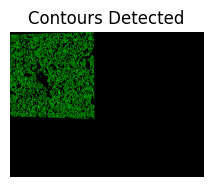

In [10]:
copy2 = np.zeros_like(img)
cv2.drawContours(copy2, contours, -1, (0, 255, 0), 2)
plt.subplot(236), plt.imshow(cv2.cvtColor(copy2, cv2.COLOR_BGR2RGB)), plt.title('Contours Detected')
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
print(len(contours))

2446
